In [1]:
!pip install openpyxl

In [2]:
!pip install geopandas

     |████████████████████████████████| 994 kB 8.7 MB/s 
     |████████████████████████████████| 6.6 MB 44.1 MB/s 
     |████████████████████████████████| 15.4 MB 38 kB/s 


In [3]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [4]:
dados = pd.read_excel("/content/dados_roubo_celular_sp_2020.xlsx")
dados.head()

ANO_BO   NUM_BO  ... QUANT_CELULAR MARCA_CELULAR
0    2020  1646238  ...           NaN          ASUS
1    2020  1646283  ...           NaN       SAMSUNG
2    2020  1646274  ...           NaN         APPLE
3    2020  1646303  ...           NaN        XIAOMI
4    2020  1646234  ...           NaN         APPLE

[5 rows x 57 columns]

In [5]:
dados.columns

Index(['ANO_BO', 'NUM_BO', 'NUMERO_BOLETIM', 'BO_INICIADO', 'BO_EMITIDO',
       'DATAOCORRENCIA', 'HORAOCORRENCIA', 'PERIDOOCORRENCIA',
       'DATACOMUNICACAO', 'DATAELABORACAO', 'BO_AUTORIA', 'FLAGRANTE',
       'NUMERO_BOLETIM_PRINCIPAL', 'LOGRADOURO', 'NUMERO', 'BAIRRO', 'CIDADE',
       'UF', 'LATITUDE', 'LONGITUDE', 'DESCRICAOLOCAL', 'EXAME', 'SOLUCAO',
       'DELEGACIA_NOME', 'DELEGACIA_CIRCUNSCRICAO', 'ESPECIE', 'RUBRICA',
       'DESDOBRAMENTO', 'STATUS', 'NOMEPESSOA', 'TIPOPESSOA', 'VITIMAFATAL',
       'RG', 'RG_UF', 'NATURALIDADE', 'NACIONALIDADE', 'SEXO',
       'DATANASCIMENTO', 'IDADE', 'ESTADOCIVIL', 'PROFISSAO', 'GRAUINSTRUCAO',
       'CORCUTIS', 'NATUREZAVINCULADA', 'TIPOVINCULO', 'RELACIONAMENTO',
       'PARENTESCO', 'PLACA_VEICULO', 'UF_VEICULO', 'CIDADE_VEICULO',
       'DESCR_COR_VEICULO', 'DESCR_MARCA_VEICULO', 'ANO_FABRICACAO',
       'ANO_MODELO', 'DESCR_TIPO_VEICULO', 'QUANT_CELULAR', 'MARCA_CELULAR'],
      dtype='object')

In [6]:
dados.shape

(16372, 57)

In [7]:
dados[['LATITUDE', 'LONGITUDE']]

LATITUDE  LONGITUDE
0            NaN        NaN
1     -23.686360 -46.765585
2     -23.612298 -46.609388
3     -23.640576 -46.760755
4     -23.593117 -46.606192
...          ...        ...
16367        NaN        NaN
16368        NaN        NaN
16369        NaN        NaN
16370        NaN        NaN
16371 -23.632600 -46.736134

[16372 rows x 2 columns]

In [8]:
dados = dados.dropna(subset=['LATITUDE', 'LONGITUDE'])

In [9]:
dados[['LATITUDE', 'LONGITUDE']]

LATITUDE  LONGITUDE
1     -23.686360 -46.765585
2     -23.612298 -46.609388
3     -23.640576 -46.760755
4     -23.593117 -46.606192
5     -23.593117 -46.606192
...          ...        ...
16363 -23.627340 -46.716842
16364 -23.635372 -46.492679
16365 -23.538349 -46.486512
16366 -23.632600 -46.736134
16371 -23.632600 -46.736134

[14668 rows x 2 columns]

In [10]:
dados[['LATITUDE', 'LONGITUDE']].isnull().sum()

LATITUDE     0
LONGITUDE    0
dtype: int64

In [11]:
from shapely.geometry import Point

In [12]:
dados['geometry'] = None

In [13]:
for index, i in dados.iterrows():
  dados.loc[index, 'geometry'] = Point(i.LONGITUDE, i.LATITUDE)

In [14]:
dados.head(1)

ANO_BO   NUM_BO  ... MARCA_CELULAR                                     geometry
1    2020  1646283  ...       SAMSUNG  POINT (-46.7655849940429 -23.6863604960612)

[1 rows x 58 columns]

In [15]:
gdf_dados = gpd.GeoDataFrame(dados, geometry='geometry')

In [16]:
gdf_dados.head(1)

ANO_BO   NUM_BO  ... MARCA_CELULAR                     geometry
1    2020  1646283  ...       SAMSUNG  POINT (-46.76558 -23.68636)

[1 rows x 58 columns]

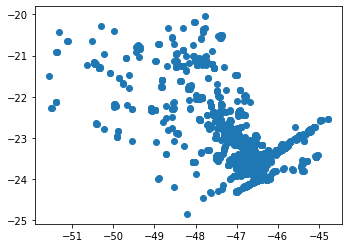

In [17]:
gdf_dados.plot()

In [18]:
gdf_capital = gpd.read_file("https://raw.githubusercontent.com/synapsedatascience/aulas-youtube/main/minicurso-geopandas/dados/capital_s%C3%A3o_paulo.json", driver='GeoJSON')

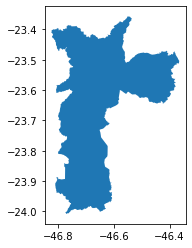

In [19]:
gdf_capital.plot()

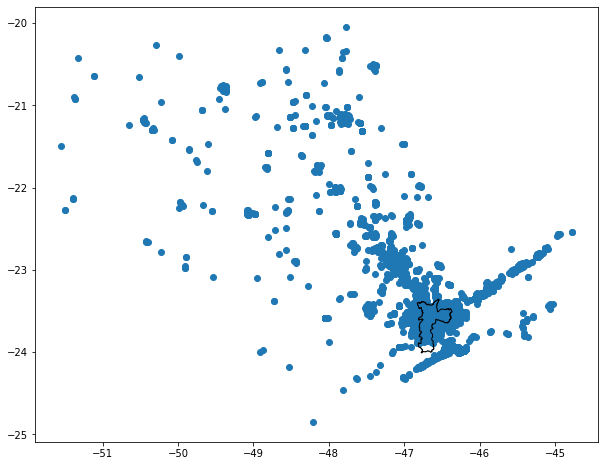

In [20]:
fig, ax = plt.subplots(figsize=(12, 8))
gdf_dados.plot(ax=ax)
gdf_capital.plot(ax=ax, facecolor='None', edgecolor="black")

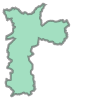

In [21]:
poly_sp = gdf_capital.iloc[0].geometry
poly_sp

In [22]:
roubos_capital = gdf_dados[gdf_dados.intersects(poly_sp)]

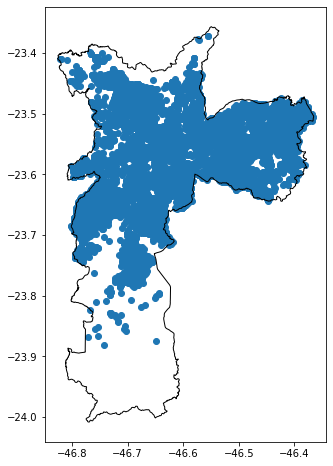

In [23]:
fig, ax = plt.subplots(figsize=(10, 8))
roubos_capital.plot(ax=ax)
gdf_capital.plot(ax=ax, facecolor='None', edgecolor="black")

In [24]:
import folium as fl

In [25]:
gdf_dados.head(1)

ANO_BO   NUM_BO  ... MARCA_CELULAR                     geometry
1    2020  1646283  ...       SAMSUNG  POINT (-46.76558 -23.68636)

[1 rows x 58 columns]

In [26]:
gdf_dados.crs = "epsg:4326"

In [27]:
roubos_corte = gdf_dados.iloc[:100]
mapa = fl.Map()
feat_gejson = fl.features.GeoJson(roubos_corte)
mapa.add_child(feat_gejson)
mapa

In [28]:
import numpy as np

In [31]:
print(type(gdf_capital))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [30]:
media_lat = roubos_corte['LATITUDE'].mean()
media_log = roubos_corte['LONGITUDE'].mean()

mapa = fl.Map(location=[media_lat, media_log])
feat_gejson = fl.features.GeoJson(gdf_capital)
mapa.add_child(feat_gejson)
mapa

In [32]:
media_lat = roubos_corte['LATITUDE'].mean()
media_log = roubos_corte['LONGITUDE'].mean()

mapa = fl.Map(location=[media_lat, media_log])
feat_gejson = fl.features.GeoJson(roubos_corte)
mapa.add_child(feat_gejson)
mapa

In [33]:
from folium.plugins import FastMarkerCluster

In [41]:
import sys
print(sys.getrecursionlimit())

1000


In [42]:
sys.setrecursionlimit(10000)

In [78]:
roubos_corte = roubos_capital.iloc[:10000]
colunas = ['LATITUDE', 'LONGITUDE']
locations = roubos_corte[colunas]

In [79]:
locations = locations.values.tolist()

In [80]:
print(type(locations[0][0]))

<class 'float'>


In [81]:
mapa = fl.Map(location=[media_lat, media_log])
mc = FastMarkerCluster(data=locations)
mapa.add_child(mc)
mapa

In [82]:
gdf_capital

CD_MUN  ...                                           geometry
0  3550308  ...  POLYGON ((-46.63386 -23.42914, -46.63341 -23.4...

[1 rows x 5 columns]

In [83]:
mapa = fl.Map(location=[media_lat, media_log])
limites = fl.features.GeoJson(gdf_capital, 
                              style_function = lambda feature: {
                                  'color':'black',
                                  'weight': 2,
                                  'fillOpacity':0.0
                              })
mapa.add_child(limites)
mc = FastMarkerCluster(data=locations)
mapa.add_child(mc)
mapa

In [84]:
mapa = fl.Map(location=[media_lat, media_log], tiles='cartodbpositron')
limites = fl.features.GeoJson(gdf_capital, 
                              style_function = lambda feature: {
                                  'color':'black',
                                  'weight': 2,
                                  'fillOpacity':0.0
                              })
mapa.add_child(limites)
mc = FastMarkerCluster(data=locations)
mapa.add_child(mc)
mapa

In [ ]:
mapa = fl.Map(location=[media_lat, media_log], tiles='CartoDBdark_matter')
limites = fl.features.GeoJson(gdf_capital, 
                              style_function = lambda feature: {
                                  'color':'black',
                                  'weight': 2,
                                  'fillOpacity':0.0
                              })
mapa.add_child(limites)
mc = FastMarkerCluster(data=locations)
mapa.add_child(mc)
mapa

In [85]:
from folium.plugins import HeatMap

In [86]:
mapa = fl.Map(location=[media_lat, media_log], tiles='cartodbpositron')

heat_map = HeatMap(data=locations)
mapa.add_child(heat_map)
mapa

In [87]:
gdf_roubos_gsp = gpd.read_file("https://raw.githubusercontent.com/synapsedatascience/aulas-youtube/main/minicurso-geopandas/dados/roubo_celular_grande_sp.json", driver="GeoJSON")

gdf_geometrias_gsp = gpd.read_file("https://raw.githubusercontent.com/synapsedatascience/aulas-youtube/main/minicurso-geopandas/dados/municipios_grande_sp.json", driver="GeoJSON")

In [89]:
gdf_geometrias_gsp.head(1)

CD_MUN NM_MUN  ... AREA_KM2                                           geometry
0  3503901  Arujá  ...   96.167  POLYGON ((-46.36995 -23.37809, -46.37010 -23.3...

[1 rows x 5 columns]

In [91]:
for index, i in gdf_geometrias_gsp.iterrows():
  qtd_roubos = len(gdf_roubos_gsp[gdf_roubos_gsp.intersects(i.geometry)])
  gdf_geometrias_gsp.loc[index, 'qtd_roubos'] = qtd_roubos

In [92]:
gdf_geometrias_gsp.head(1)

CD_MUN  ... qtd_roubos
0  3503901  ...       18.0

[1 rows x 6 columns]

In [95]:
media_lat_sp = gdf_roubos_gsp['LATITUDE'].mean()
media_log_sp = gdf_roubos_gsp['LONGITUDE'].mean()

mapa = fl.Map(location=[media_lat_sp, media_log_sp])

for _, i in gdf_geometrias_gsp.iterrows():
  municipio_geojson = fl.features.GeoJson(i.geometry,
                                          style_function = lambda feature: {
                                              'color':'red',
                                              'weight':2,
                                              'fillOpacity':0.1
                                          })
  
  popup = fl.Popup("""
                    Municipio: {}
                    Roubos em novembro: {}
                    """.format(i.NM_MUN, str(int(i.qtd_roubos))))

  popup.add_to(municipio_geojson)
  municipio_geojson.add_to(mapa)
  
mapa